# Customer Churn Analysis
Context
The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to steal customers.  Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers.  Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
Help them identify the types of customers who churn
Predict who of their current customers will churn next month

To do this, they offer you a file of 7,000 customers. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month.  The data also offers demographic data and data on the services that each customer purchases.  Finally there is information on the payments those customers make.

# Deliverables - What is expected

# Week 1
A presentation explaining churn for the marketing team - with links to technical aspects of your work. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.

1- How much is churn affecting the business? How big is churn compared to the existing customer base?

2- Explain churn by the below categories. Are there any factors that combine to be especially impactful?

a- Customer demographics like age and gender
b- Services used
c- Billing information

3- What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?

4- Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?


# import all libraries need

In [3]:
#Import the data: 
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Data Prepocessing #

In [6]:
# Read the online file by the URL provides above, and assign it to variable "df"
url= "dataset/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv"
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.shape

(7043, 21)

In [10]:
## Find missing value
df.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

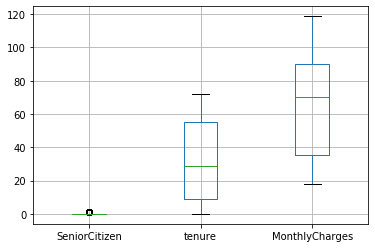

In [11]:
# Graph 
df.boxplot()

In [12]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [13]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## df.dropna(subset=['TotalCharges'],axis=0,inplace=True)

# Data Analysis #

In [16]:
dum_churn = pd.get_dummies(df['Churn'])

In [17]:
dum_churn

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


# How much is churn affecting the business?

In [18]:
## Total churn
dum_churn['Yes'].value_counts().to_frame()

,Yes
0,5174
1,1869


In [19]:
# As we can see, there are 1869 people who left the company

Churn
No     5174
Yes    1869
dtype: int64

Text(0.5, 1.0, 'Percent of Churn')

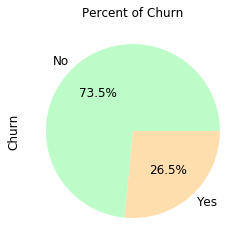

In [20]:
display(df.groupby(['Churn']).size())
colors = ["#BDFCC9","#FFDEAD"]
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', colors=colors, labels = ['No', 'Yes'],figsize =(4,4), fontsize = 12 )    
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Percent of Churn', fontsize = 12)


In [21]:
# They are 26.6 percent of churn 

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Customer demographics like age and gender

# Gender #

In [23]:
gender = df.groupby(['SeniorCitizen','gender','Churn']).size().to_frame()
gender

0
SeniorCitizen gender Churn      
0             Female No     2221
                     Yes     699
              Male   No     2287
                     Yes     694
1             Female No      328
                     Yes     240
              Male   No      338
                     Yes     236

Text(0.5, 1.0, 'Churn distribution by gender')

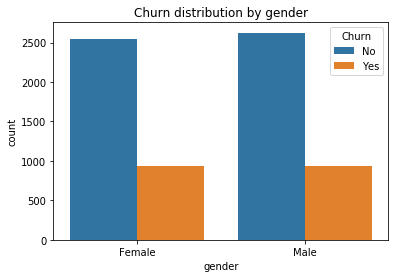

In [24]:
ax = sns.countplot (x="gender",hue="Churn",data=df)
ax.set_title("Churn distribution by gender")

# SeniorCitizen #

Text(0.5, 1.0, 'Churn distribution by SeniorCitizen')

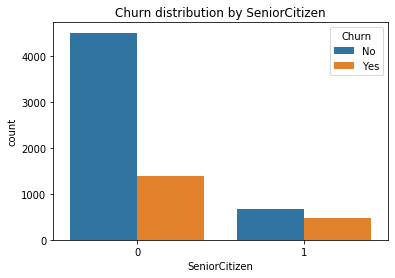

In [25]:
ax = sns.countplot (x="SeniorCitizen",hue="Churn",data=df)
ax.set_title("Churn distribution by SeniorCitizen")

# Partner #

Text(0.5, 1.0, 'Churn distribution by Partner')

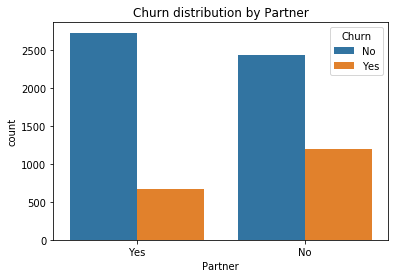

In [26]:
ax = sns.countplot (x="Partner",hue="Churn",data=df)
ax.set_title("Churn distribution by Partner")

# Dependents #

Text(0.5, 1.0, 'Churn distribution by Dependents')

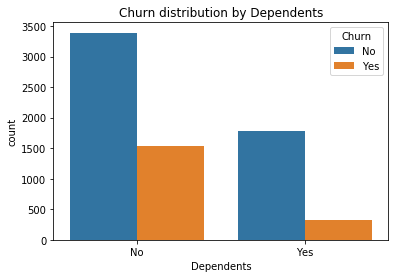

In [27]:
ax = sns.countplot (x="Dependents",hue="Churn",data=df)
ax.set_title("Churn distribution by Dependents")

# The sevices used

# PhoneService #

Text(0.5, 1.0, 'Churn distribution by PhoneService')

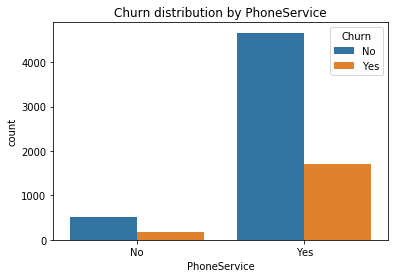

In [28]:
ax = sns.countplot (x="PhoneService",hue="Churn",data=df)
ax.set_title("Churn distribution by PhoneService")

# InternetService

Text(0.5, 1.0, 'Churn distribution by InternetService')

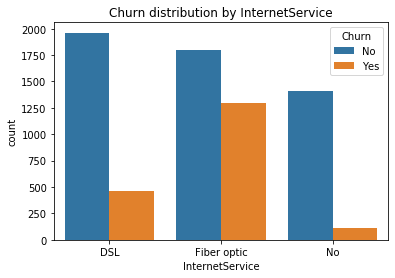

In [29]:
ax = sns.countplot (x="InternetService",hue="Churn",data=df)
ax.set_title("Churn distribution by InternetService")

 # TechSupport

Text(0.5, 1.0, 'Churn distribution by TechSupport')

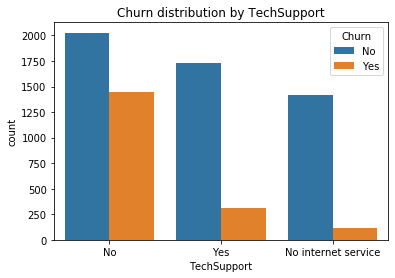

In [30]:
ax = sns.countplot (x="TechSupport",hue="Churn",data=df)
ax.set_title("Churn distribution by TechSupport")

# StreamingTV

Text(0.5, 1.0, 'Churn distribution by StreamingTV')

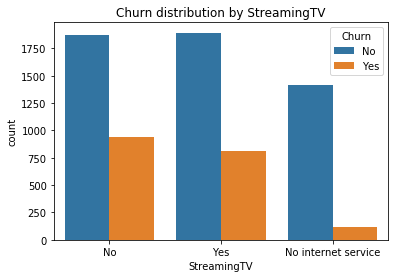

In [31]:
ax = sns.countplot (x="StreamingTV",hue="Churn",data=df)
ax.set_title("Churn distribution by StreamingTV")

# StreamingMovies #

Text(0.5, 1.0, 'Churn distribution by StreamingMovies')

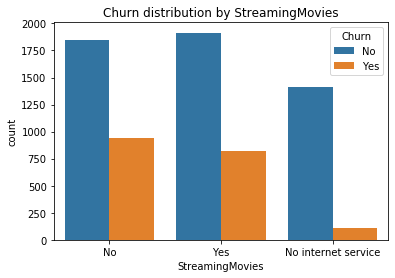

In [32]:
ax = sns.countplot (x="StreamingMovies",hue="Churn",data=df)
ax.set_title("Churn distribution by StreamingMovies")

# OnlineSecurity#

Text(0.5, 1.0, 'Churn distribution by OnlineSecuritys')

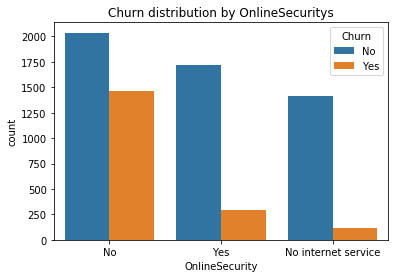

In [33]:
ax = sns.countplot (x="OnlineSecurity",hue="Churn",data=df)
ax.set_title("Churn distribution by OnlineSecuritys")

# OnlineBackup #

Text(0.5, 1.0, 'Churn distribution by OnlineBackup')

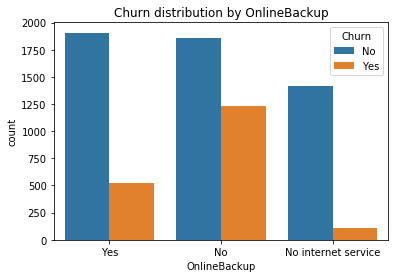

In [34]:
ax = sns.countplot (x="OnlineBackup",hue="Churn",data=df)
ax.set_title("Churn distribution by OnlineBackup")

# MultipleLines #

Text(0.5, 1.0, 'Churn distribution by MultipleLines')

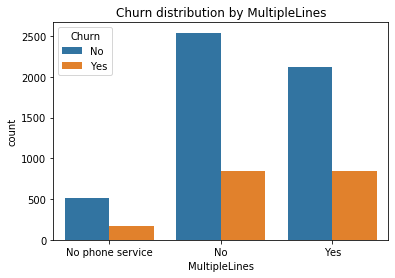

In [35]:
ax = sns.countplot (x="MultipleLines",hue="Churn",data=df)
ax.set_title("Churn distribution by MultipleLines")

# DeviceProtection

Text(0.5, 1.0, 'Churn distribution by DeviceProtection')

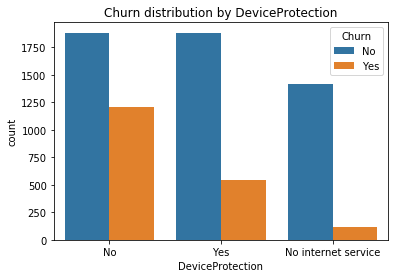

In [36]:
ax = sns.countplot (x="DeviceProtection",hue="Churn",data=df)
ax.set_title("Churn distribution by DeviceProtection")

# Billing information


 # Contrat

Text(0.5, 1.0, 'Churn distribution by Contract')

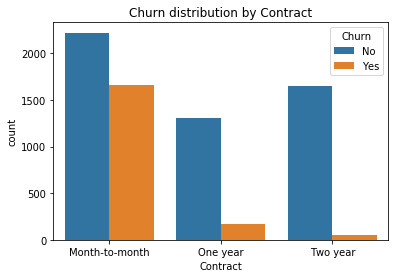

In [37]:
ax = sns.countplot (x="Contract",hue="Churn",data=df)
ax.set_title("Churn distribution by Contract")

# PaperlessBilling

Text(0.5, 1.0, 'Churn distribution by PaperlessBilling')

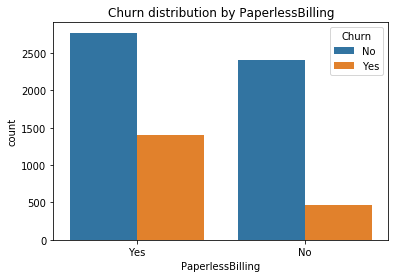

In [38]:
ax = sns.countplot (x="PaperlessBilling",hue="Churn",data=df)
ax.set_title("Churn distribution by PaperlessBilling")

# PaymentMethod

Text(0.5, 1.0, 'Churn distribution by PaymentMethod')

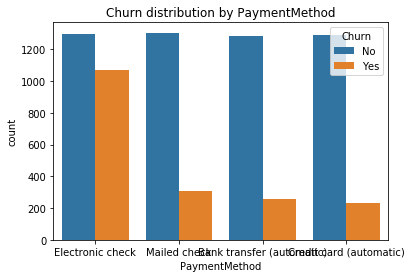

In [39]:
ax = sns.countplot (x="PaymentMethod",hue="Churn",data=df)
ax.set_title("Churn distribution by PaymentMethod")

# What services are typically purchased by customers who churned?

In [40]:
df.Churn.replace(to_replace = {'Yes'==1,'No==0'}, inplace=True)

In [41]:
cols =df.columns
cols = list(cols)
display(cols)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [42]:
service_a=df.groupby('Churn').mean()
service_a

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [43]:

value = df[df.Churn=='Yes']
value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [44]:
service = value.groupby(['PhoneService','gender']).size().to_frame()
service

0
PhoneService gender     
No           Female   80
             Male     90
Yes          Female  859
             Male    840

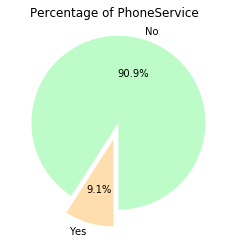

In [45]:
#percent of customer churn used phone service
sizes = value['PhoneService'].value_counts(sort = True)
colors = ["#BDFCC9","#FFDEAD"]
explode = (0.1,0.1)
labels= ['No','Yes']
# Plot
plt.pie(sizes,colors=colors,labels=labels,explode=explode,autopct='%1.1f%%',startangle=270,)
plt.title('Percentage of PhoneService ')
plt.show()

Text(0.5, 1.0, 'Churn distribution by InternetService')

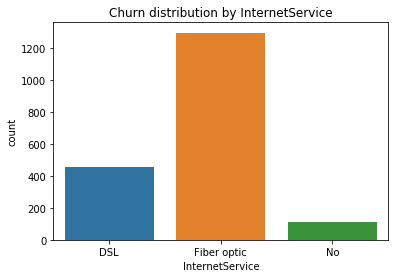

In [46]:
ax = sns.countplot(x="InternetService",data=value)
ax.set_title("Churn distribution by InternetService")


Text(0.5, 1.0, 'Churn distribution by MultipleLines')

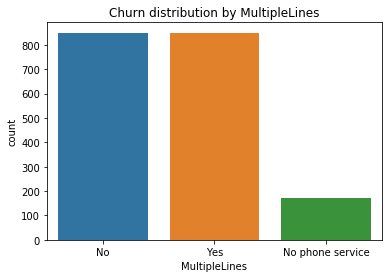

In [47]:
ax = sns.countplot(x="MultipleLines",data=value)
ax.set_title("Churn distribution by MultipleLines")
#moun ki pa itilize phone service gn mwens pou churn

Text(0.5, 1.0, 'Churn distribution by InternetService')

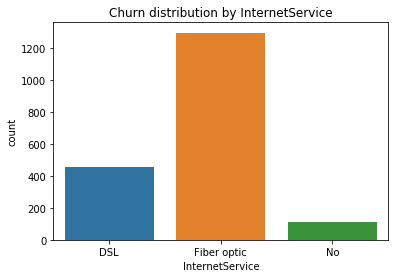

In [48]:
ax = sns.countplot(x="InternetService",data=value)
ax.set_title("Churn distribution by InternetService")

Text(0.5, 1.0, 'Churn distribution by OnlineSecurity')

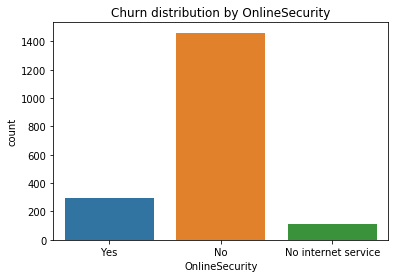

In [49]:
ax = sns.countplot(x="OnlineSecurity",data=value)
ax.set_title("Churn distribution by OnlineSecurity")

Text(0.5, 1.0, 'Churn distribution by DeviceProtection')

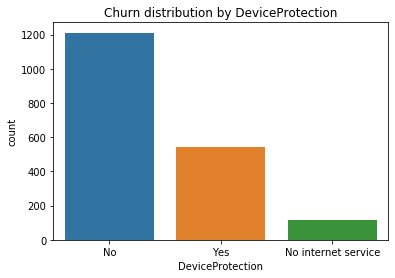

In [50]:
ax = sns.countplot(x="DeviceProtection",data=value)
ax.set_title("Churn distribution by DeviceProtection")

Text(0.5, 1.0, 'Churn distribution by TechSupport')

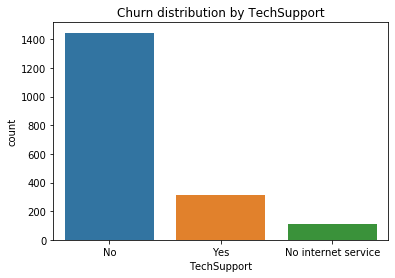

In [51]:

ax = sns.countplot(x="TechSupport",data=value)
ax.set_title("Churn distribution by TechSupport")

Text(0.5, 1.0, 'Churn distribution by StreamingTV')

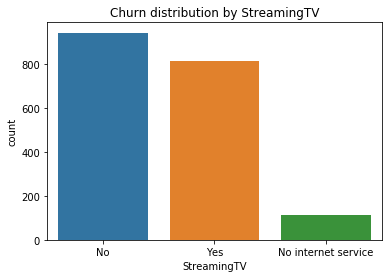

In [52]:
ax = sns.countplot(x="StreamingTV",data=value)
ax.set_title("Churn distribution by StreamingTV")

Text(0.5, 1.0, 'Churn distribution by StreamingMovies')

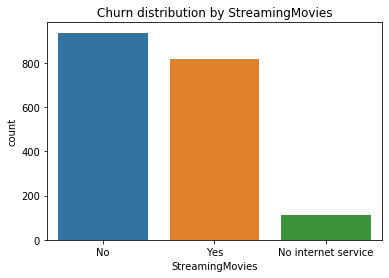

In [53]:
ax = sns.countplot(x="StreamingMovies",data=value,)
ax.set_title("Churn distribution by StreamingMovies")

In [54]:
phone_service= value.groupby(['PhoneService']).size().to_frame()
service


0
PhoneService gender     
No           Female   80
             Male     90
Yes          Female  859
             Male    840